# How to compute the chance of TotalPnL going below 0
1. The MA40 and MA200 used in the strategy are the random variables
    -> What is the distribution
2. What is a random variable
    -> Recording the face value of two dies
    -> The Sum of the faces is the Random Varaible, outcome is not a random variable, the value is the random one
    -> Discrete / Continuous -> Can take in any values
3. Distribution of Random Variables
    -> Used in risk management

Code Explained:
1. Creating a DataFrame pd.DataFrame([]) -> () is used to build the dataframe and [] represents a list
2. Replace=True allows for same number in both die
3. .loc[0] extracts the value from the series and returns it as a scalar. This is necessary because sum()
returns a series with the index of the original DataFrame, which is not needed here.

Below gives a simple sample using 2 die

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

die = pd.DataFrame([1,2,3,4,5,6]) # All possible outcomes of a die
sumdie = die.sample(2, replace=True).sum().loc[0]
print("Sum of Dice is:", sumdie)

Sum of Dice is: 7


In [58]:
trail = 1000
traildie = [int(die.sample(2, replace=True).sum().loc[0]) for i in range(trail)]
traildie[:10]

# Had to add the int() to remove the numpy object type

[7, 3, 6, 8, 4, 8, 9, 4, 4, 3]

# Distribution
1. Frequence
-> Counts the number of occurences

<Axes: xlabel='Sum', ylabel='No. of Occurences'>

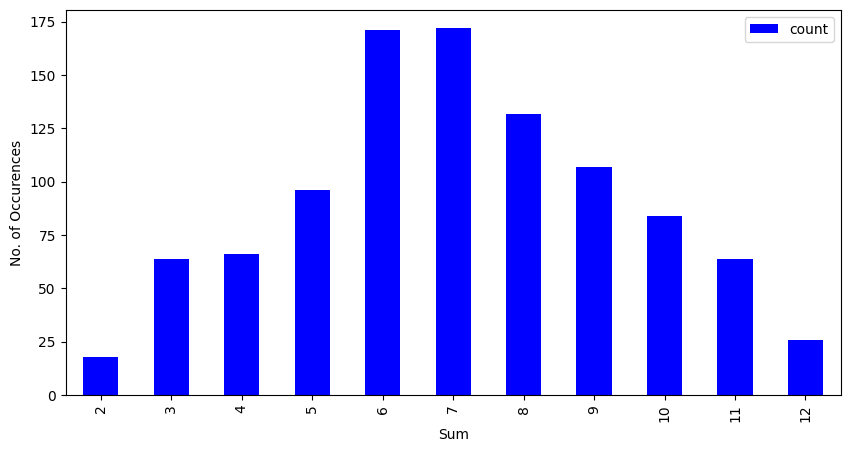

In [59]:
# Retitles column to Sum and Counts the number of times each sum occurs
freq = pd.DataFrame(traildie, columns = ['Sum'])['Sum'].value_counts()
sort_freq = freq.sort_index()
sort_freq.head()

# Plots the frequency of each sum
sort_freq.plot(kind='bar', figsize=(10,5), color='blue', ylabel='No. of Occurences', legend=True)

# Relative Frequency
$$ Rel. Freq = \frac{Freq}{Number of Trials}\$$
Goal: Normalize -> Create a normal distribution

<Axes: xlabel='Sum', ylabel='Relative Frequency'>

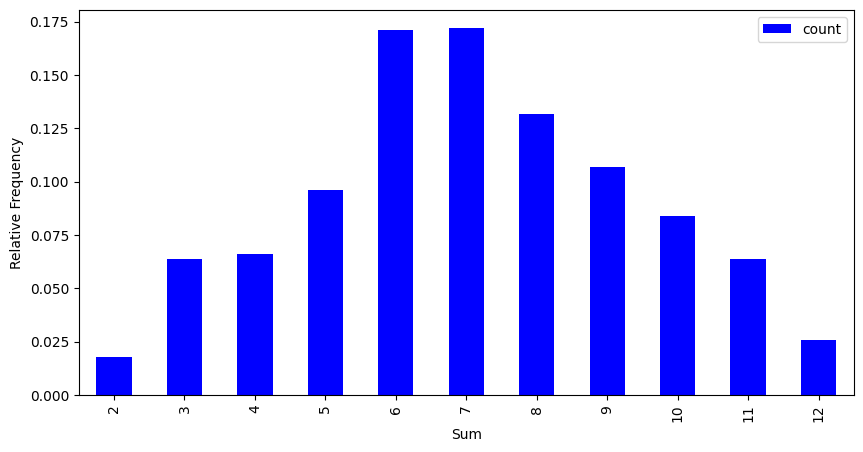

In [60]:
Relative_freq = sort_freq/trail
Relative_freq.plot(kind='bar', figsize=(10,5), color='blue', ylabel='Relative Frequency', legend=True)

# Mean and Variance of a Discrete Random Variance
$$ Mean (Expected Value) = \sum_{i}p_ix_i$$
$$ Variance = \sum_{i}(x_i-Mean)^2p_i$$

Expected Value = Summation of x_i (Any Outcome) * Probability for this outcome
Variance = Summation of the difference between x and Mean squared

# Mean and Variance of a Continuous Random Variance
-> Probability Density Function (PDF) used to compute probability for Continuous Random Variable
-> Can be used to apprximate the distribution of the stock return
-> Integrate to find the probability for a range

In [61]:
X_distri = pd.DataFrame(index=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
X_distri['Prob'] = [1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1]
X_distri['Prob'] = X_distri['Prob']/36
X_distri

,Prob
2,0.027778
3,0.055556
4,0.083333
5,0.111111
6,0.138889
7,0.166667
8,0.138889
9,0.111111
10,0.083333
11,0.055556


In [ ]:
mean = pd.Series(X_distri.index * X_distri['Prob']).sum()
var = pd.Series(((X_distri.index - mean)**2)*X_distri['Prob']).sum()
# Just applying the formula here
print("Mean is:", mean)
print("Variance is:", var)

Mean is: 6.999999999999998
Variance is: 5.833333333333333


# Modelling Distribution for Risk Management


<Axes: xlabel='Date', ylabel='Price'>

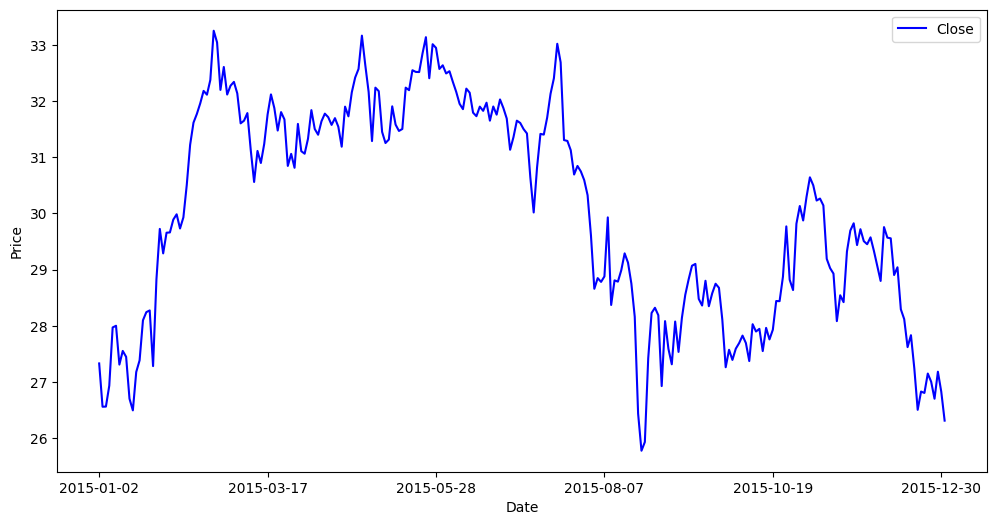

In [74]:
aapl = pd.read_csv('AAPL.csv',index_col=0)
aapl.loc['2015-01-01':'2015-12-31','Close'].plot(figsize=(12,6), color='blue', ylabel='Price', legend=True)

<Axes: >

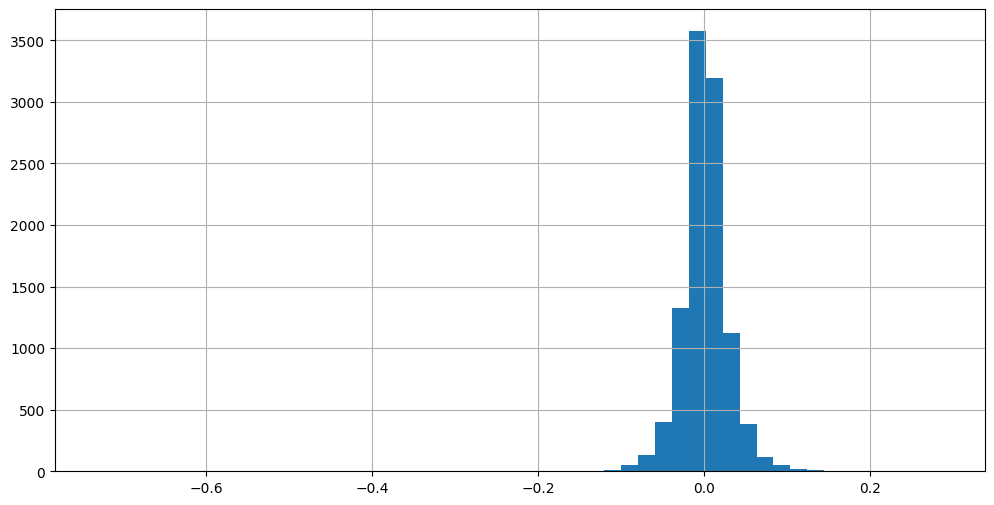

In [ ]:
aapl['LogReturns'] = np.log(aapl['Close']).shift(-1) - np.log(aapl['Close']) # log Daily Returns
aapl['LogReturns'].hist(bins=50, figsize=(12,6)) # Normal Distribution Non-Linear Way

In [ ]:
from scipy.stats import norm

density = pd.DataFrame()
density['x'] = np.arange(-4, 4, 0.001)
density['pdf'] = norm.pdf(density['x'], 0, 1) # 0 mean, 1 std deviation
density['cdf'] = norm.cdf(density['x'], 0, 1) # 0 mean, 1 std deviation

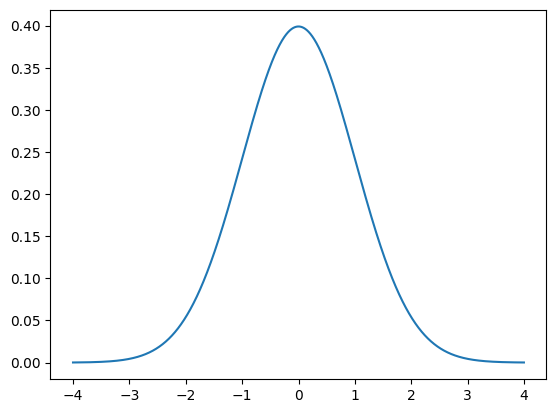

In [ ]:
# PDF Plot
plt.plot(density['x'],density['pdf']) # Uses density['x'] as x-axis and density['pdf'] as y-axis

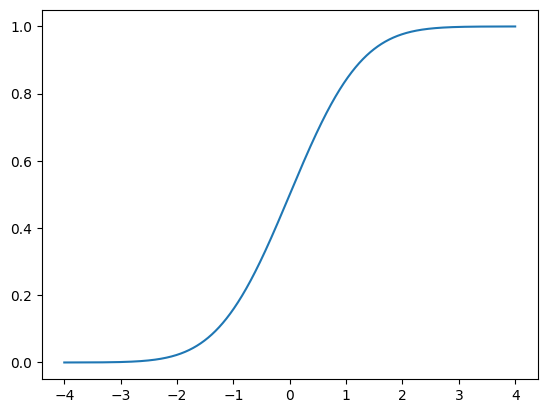

In [ ]:
# CDF Plot, x takes large values, cumulative distribution approaches 1
plt.plot(density['x'],density['cdf'])

# Approximating the logs returns using mean and variance of x

In [89]:
mu = aapl['LogReturns'].mean()
sigma = aapl['LogReturns'].std(ddof=1) # Sample Standard Deviation
print("Mean is:", mu)
print("Standard Deviation is:", sigma)

Mean is: 0.0006929734350073612
Standard Deviation is: 0.028803431456525887


In [95]:
prob_lose = norm.cdf(-0.05, mu, sigma) # Probability that the stock price of apple will drop over 5% in a day
print("Probability of a return less than -0.05 is:", prob_return)
prob_lose.plot(kind='line')

Probability of a return less than -0.05 is: 0.03920704070813455


AttributeError: 'numpy.float64' object has no attribute 'plot'